# Plots

Lot of them.

In [39]:
from load_utils import load_data
from features import all_features
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df, target = load_data()
features = all_features(df)

# Most flatten df: all columns are features
flat_df = pd.concat([features, target], axis=1)
flat_df = flat_df.stack('WF').reset_index(level='WF')

# With WF for the description; features in `var` column
melt_df = flat_df.reset_index().melt(id_vars=['Time', 'WF', 'Production'])  #value_name='value')

/home/gaspardb/Documents/MVA/challenge_data/features.py:26: RuntimeWarning: invalid value encountered in arccos
  result = np.arccos(u*v/np.abs(u*v))


In [20]:
melt_df.head()

,Time,WF,var,value
0,2018-05-05,1,CLCT_mean,75.226218
1,2018-05-05,2,CLCT_mean,-0.000016
2,2018-05-05,3,CLCT_mean,-0.000016
3,2018-05-05,4,CLCT_mean,-0.000016
4,2018-05-05,5,CLCT_mean,-0.000016


In [18]:
flat_df.head()

var,WF,CLCT_mean,CLCT_mean_diff,Production,T_mean,T_mean_diff,angle,angle_diff,windspeed,windspeed_diff
Time,,,,,,,,,,
2018-05-05,1,75.226218,NaN,1.48,290.671589,NaN,1.121997,NaN,14.906984,NaN
2018-05-05,2,-0.000016,NaN,3.88,283.483258,NaN,0.000000,NaN,57.735555,NaN
2018-05-05,3,-0.000016,NaN,5.93,280.844923,NaN,0.000000,NaN,48.406379,NaN
2018-05-05,4,-0.000016,NaN,0.93,281.509920,NaN,0.112200,NaN,40.314498,NaN
2018-05-05,5,-0.000016,NaN,0.31,281.664366,NaN,0.000000,NaN,34.967583,NaN


## Linear regression: Production vs. var, for each WF

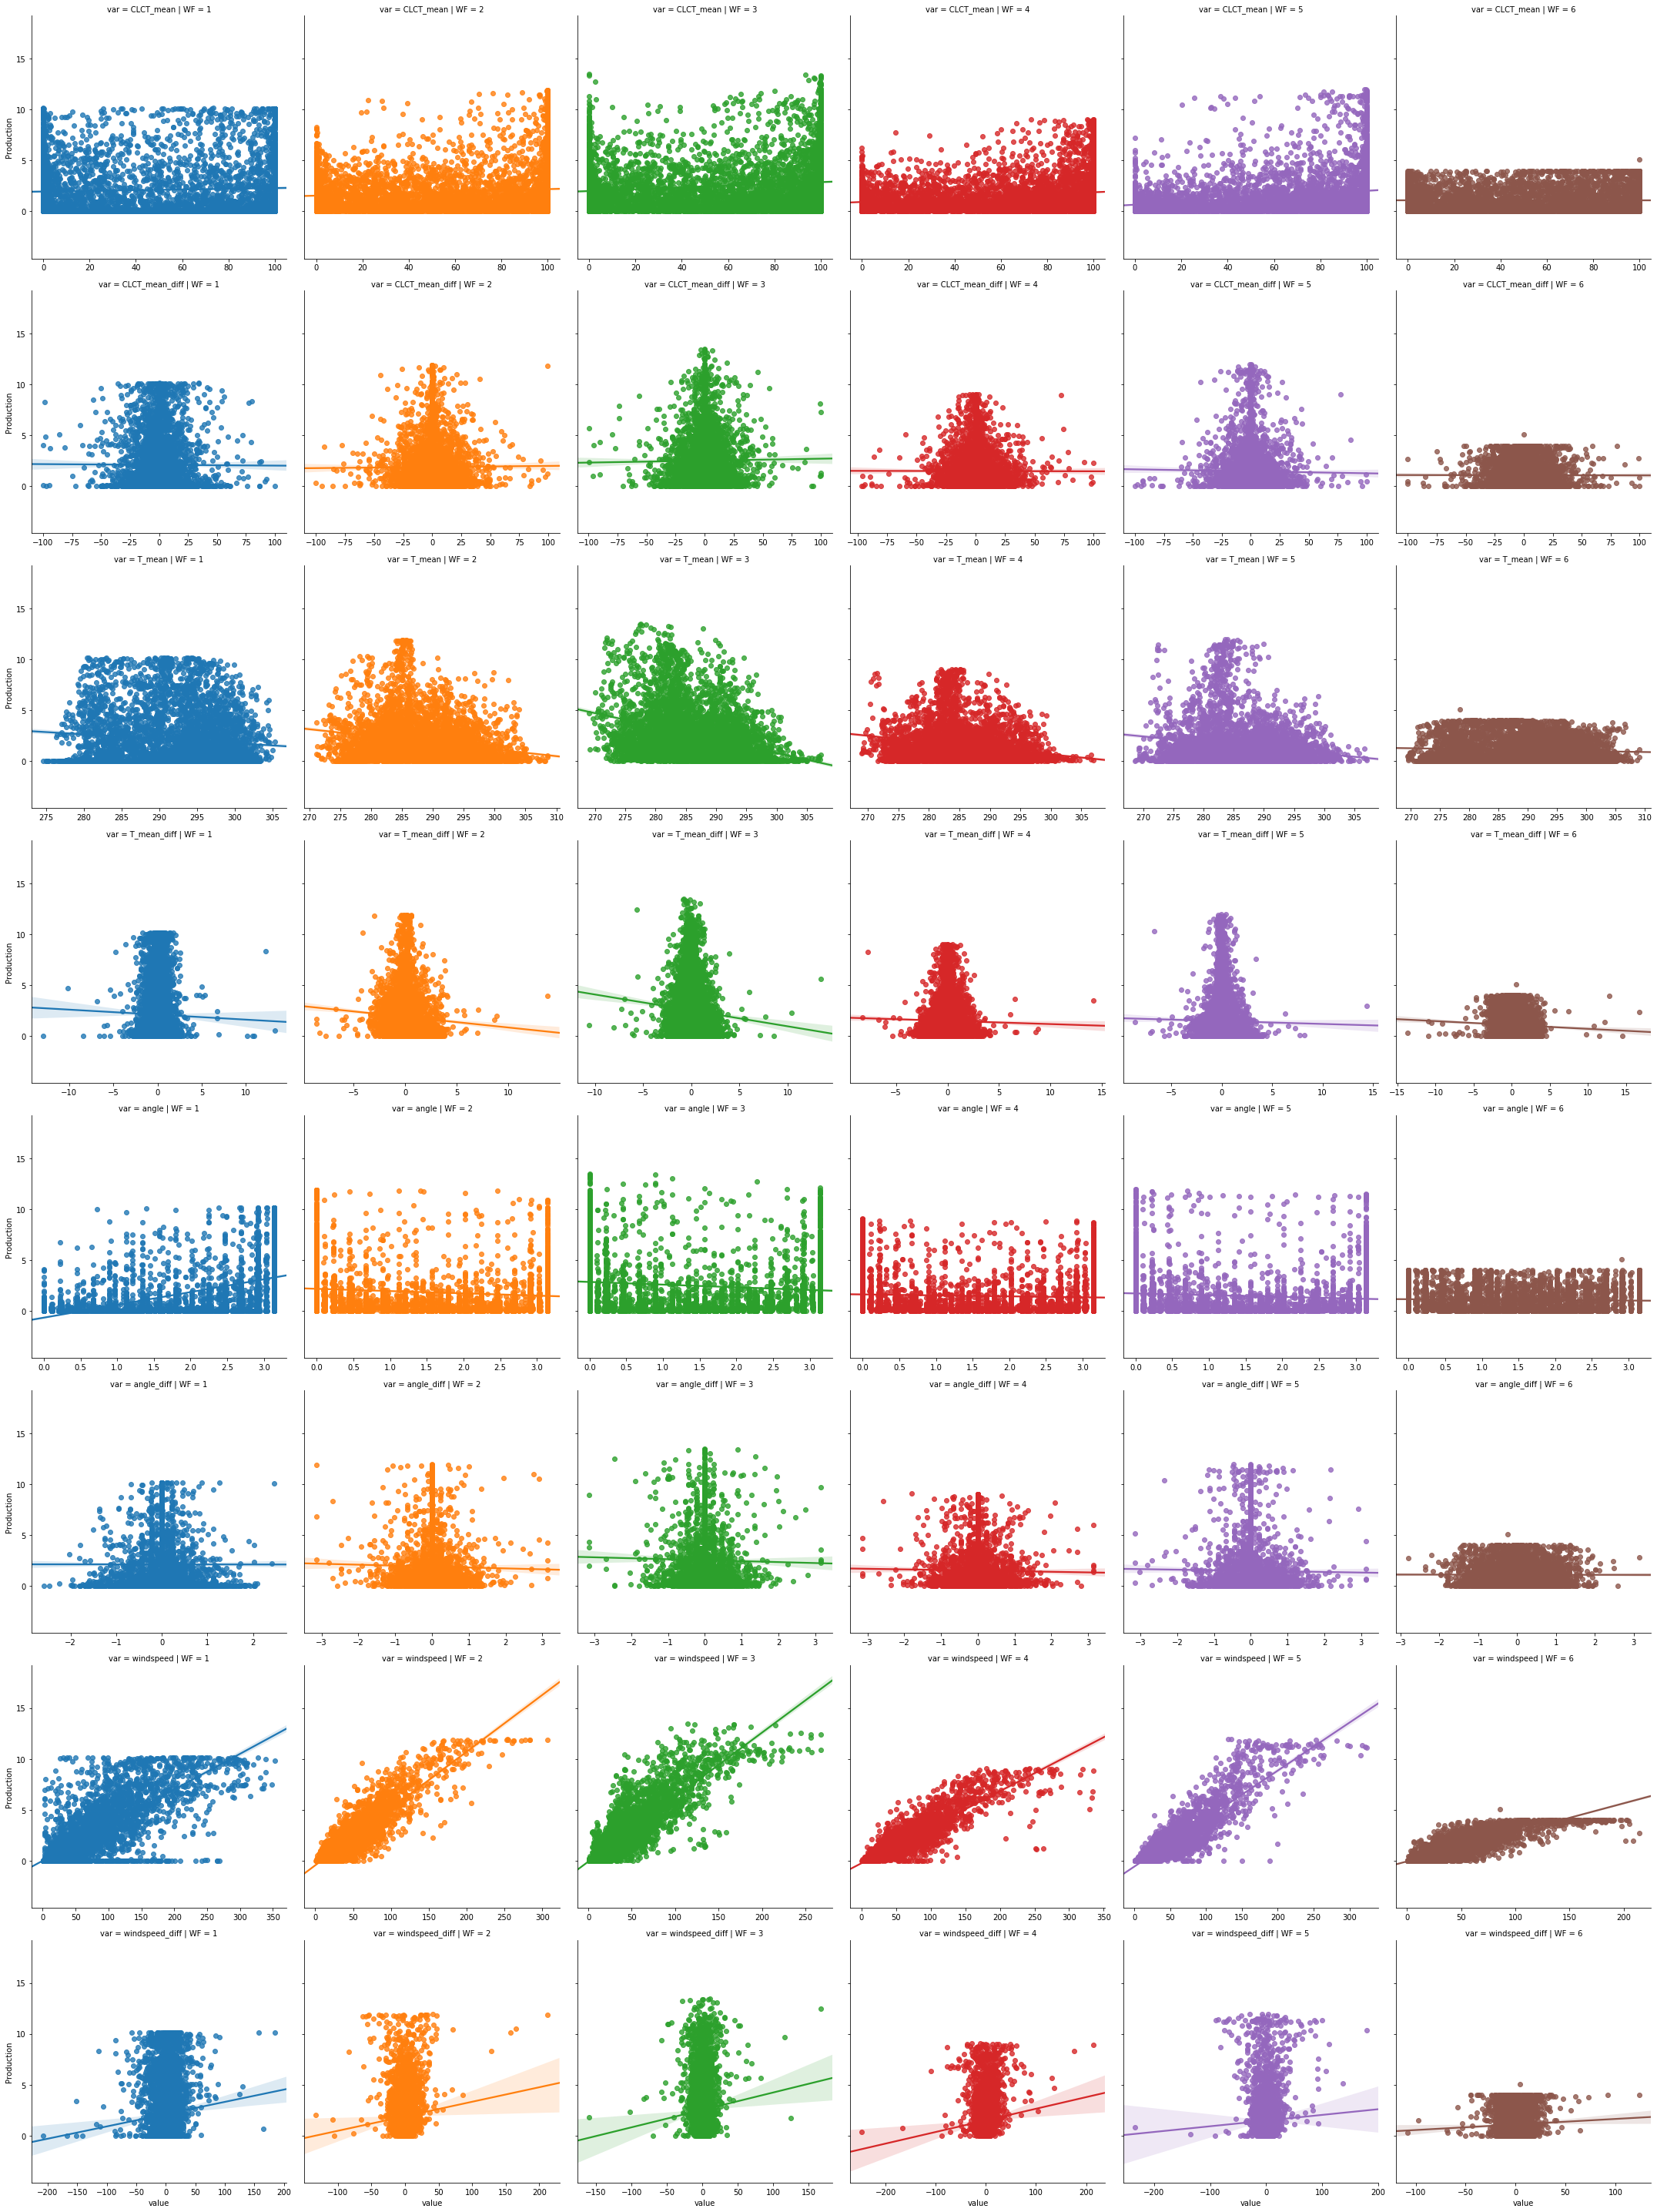

In [52]:
g = sns.lmplot(x='value', y='Production', col='WF', hue='WF', row='var', 
               data=melt_df, sharex=False, sharey=True)

In [53]:
g.savefig('samples/all_feat_regression.png')

## Production repartition for each WF

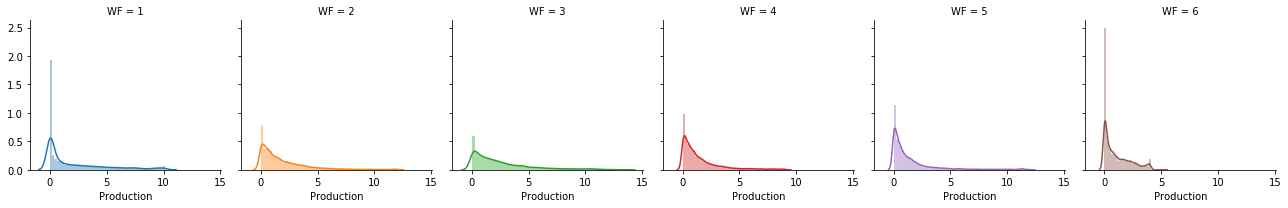

In [62]:
g = sns.FacetGrid(col='WF', hue='WF', data=melt_df)
g.map(sns.distplot, "Production")

In [63]:
g.savefig('samples/production_repartition_for_WF.png')